<a href="https://colab.research.google.com/github/AlisileAnusri/Weather_Prediction_Ensemble/blob/Anu/WeatherPredictionEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import warnings
data_set=pd.read_csv('/seattle-weather.csv')


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [5]:
warnings.filterwarnings('ignore')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print(data_set.head())
print('(Row,Col)',data_set.shape) 
print('Null sum')
print(data_set.isna().sum())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
(Row,Col) (1461, 6)
Null sum
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


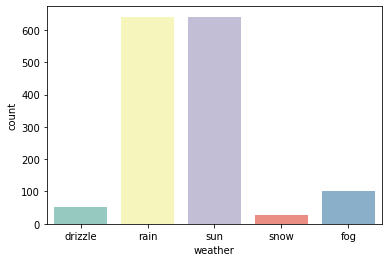

In [8]:
sns.countplot("weather",data=data_set,palette="Set3")

In [9]:
    countsun=len(data_set[data_set.weather=="sun"])
    countdrizzle=len(data_set[data_set.weather=="drizzle"])
    countsnow=len(data_set[data_set.weather=="snow"])
    countfog=len(data_set[data_set.weather=="fog"])
    countrain=len(data_set[data_set.weather=="rain"])
    n=len(data_set.weather)
    print("Percent of Rain:{:2f}%".format((countrain/n*100)))
    print("Percent of Sun:{:2f}%".format((countsun/n*100)))
    print("Percent of Drizzle:{:2f}%".format((countdrizzle/n*100)))
    print("Percent of Snow:{:2f}%".format((countsnow/n*100)))
    print("Percent of Fog:{:2f}%".format((countfog/n*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


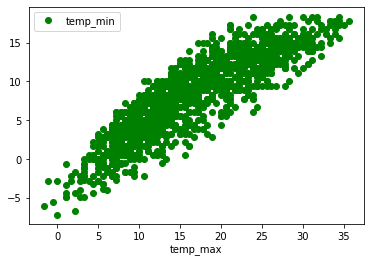

In [10]:
data_set.plot("temp_max","temp_min",style='o',color='green') 

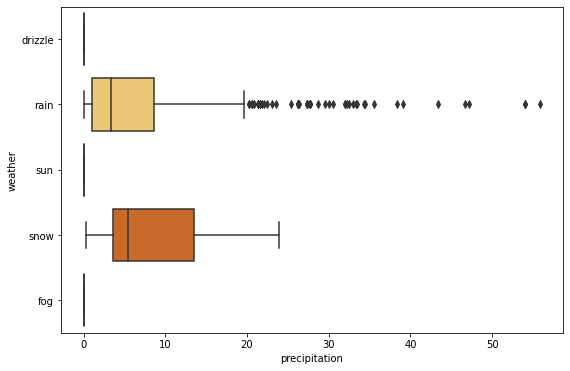

In [11]:
plt.figure(figsize=(9,6))
sns.boxplot(x="precipitation",y="weather",data=data_set,palette="YlOrBr")

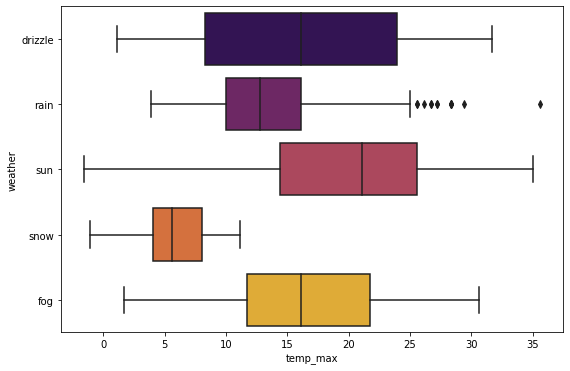

In [12]:
plt.figure(figsize=(9,6))
sns.boxplot("temp_max","weather",data=data_set,palette="inferno")

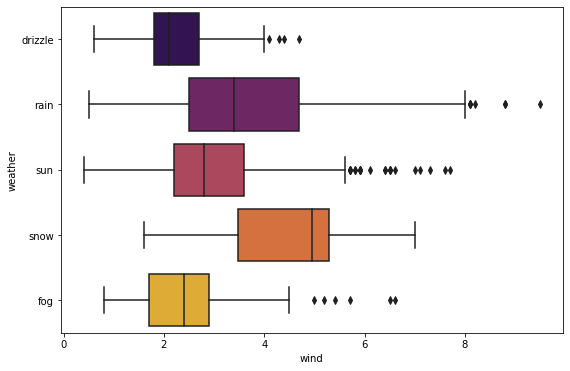

In [13]:
plt.figure(figsize=(9,6))
sns.boxplot("wind","weather",data=data_set,palette="inferno")

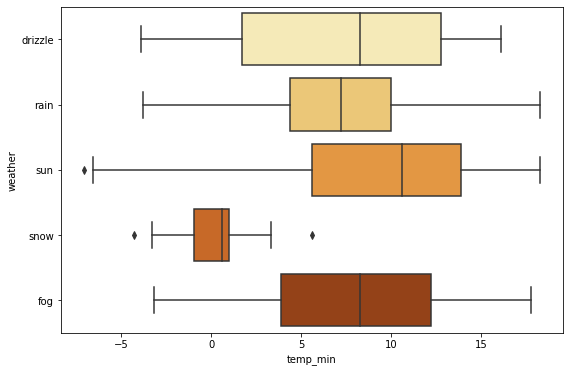

In [14]:
plt.figure(figsize=(9,6))
sns.boxplot("temp_min","weather",data=data_set,palette="YlOrBr")

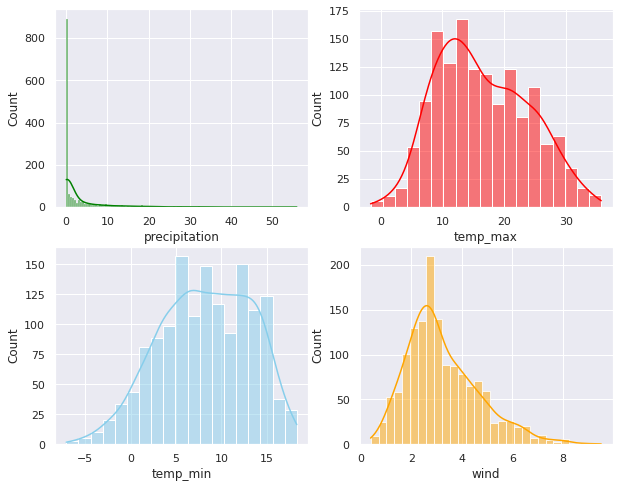

In [15]:
    sns.set(style="darkgrid")
    fig,axs=plt.subplots(2,2,figsize=(10,8))
    sns.histplot(data=data_set,x="precipitation",kde=True,ax=axs[0,0],color='green')
    sns.histplot(data=data_set,x="temp_max",kde=True,ax=axs[0,1],color='red')
    sns.histplot(data=data_set,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
    sns.histplot(data=data_set,x="wind",kde=True,ax=axs[1,1],color='orange')

In [16]:
lc=LabelEncoder()
data_set["weather"]=lc.fit_transform(data_set["weather"])
print(data_set['weather'].unique())
data_set.drop(["date"],axis=1)

[0 2 4 3 1]


,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


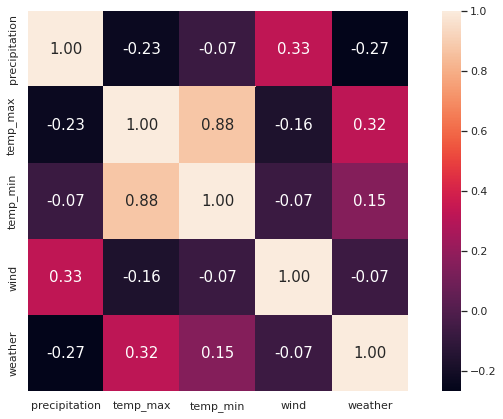

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(data_set.corr(),
              cbar=True,
              annot=True,square=True,fmt='.2f',annot_kws={'size':15},
              )

In [18]:
Q1=data_set.quantile(0.25)
Q3=data_set.quantile(0.75)
IQR=Q3-Q1
data_set=data_set[~((data_set<(Q1-1.5*IQR))|(data_set>(Q3+1.5*IQR))).any(axis=1)]

In [19]:
data_set['precipitation']=np.sqrt(data_set.precipitation)
data_set['wind']=np.sqrt(data_set.wind)

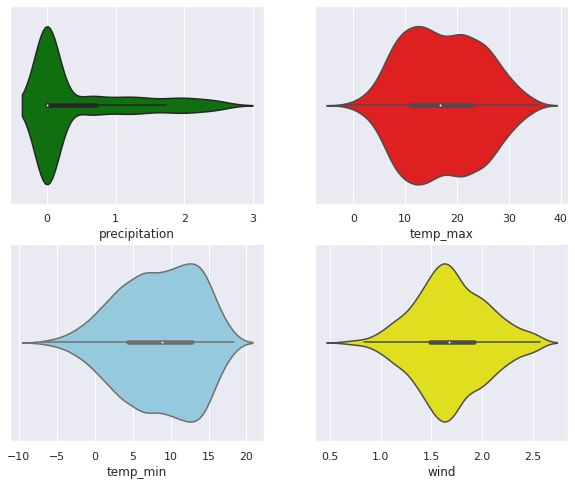

In [20]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data_set,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data_set,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data_set,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data_set,x="wind",kde=True,ax=axs[1,1],color='yellow')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
cols=['precipitation','temp_max','temp_min','wind']
X=data_set[cols].values           
Y=data_set[['weather']].values    
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [23]:
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=3, random_state=0)
model_3 = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10, 
                                 random_state=1,
                                 n_jobs=2)
model_4=SVC()
model_5=KNeighborsClassifier()

model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)
model_4.fit(x_train,y_train)
model_5.fit(x_train,y_train)

m1_pred=model_1.predict(x_test)
count=0
for s in range(len(m1_pred)):
  if m1_pred[s]!=y_test[s]:
    count+=1
print('Misclassified samples: ',count)
print('Logistic Regression:{:.2f}%'.format((accuracy_score(y_test,m1_pred)*100)))
m2_pred=model_2.predict(x_test)
count=0
for s in range(len(m2_pred)):
  if m2_pred[s]!=y_test[s]:
    count+=1
print('Misclassified samples: ',count)
print('Decision Tree :{:.2f}%'.format((accuracy_score(y_test,m2_pred)*100)))
m3_pred=model_3.predict(x_test)
count=0
for s in range(len(m3_pred)):
  if m3_pred[s]!=y_test[s]:
    count+=1
print('Misclassified samples: ',count)
print('Random Forest:{:.2f}%'.format((accuracy_score(y_test,m3_pred)*100)))

m4_pred=model_4.predict(x_test)
count=0
for s in range(len(m4_pred)):
  if m4_pred[s]!=y_test[s]:
    count+=1
print('Misclassified samples: ',count)
print('SVM:{:.2f}%'.format((accuracy_score(y_test,m4_pred)*100)))

m5_pred=model_5.predict(x_test)
count=0
for s in range(len(m1_pred)):
  if m5_pred[s]!=y_test[s]:
    count+=1
print('Misclassified samples: ',count)
print('KNN:{:.2f}%'.format((accuracy_score(y_test,m5_pred)*100)))



Misclassified samples:  40
Logistic Regression:83.81%
Misclassified samples:  40
Decision Tree :83.81%
Misclassified samples:  49
Random Forest:80.16%
Misclassified samples:  50
SVM:79.76%
Misclassified samples:  62
KNN:74.90%


In [24]:
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')
final_model.fit(x_train, y_train)
pred_final = final_model.predict(x_test)
count=0
for s in range(len(pred_final)):
  if pred_final[s]!=y_test[s]:
    count+=1
print('Misclassified samples: ',count)#compute
print('Ensemble:{:.2f}%'.format((accuracy_score(y_test,pred_final)*100)))

Misclassified samples:  40
Ensemble:83.81%
